In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#1: Load and Restore Image
image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.GaussianBlur(image, (5, 5), 0)  # Remove noise


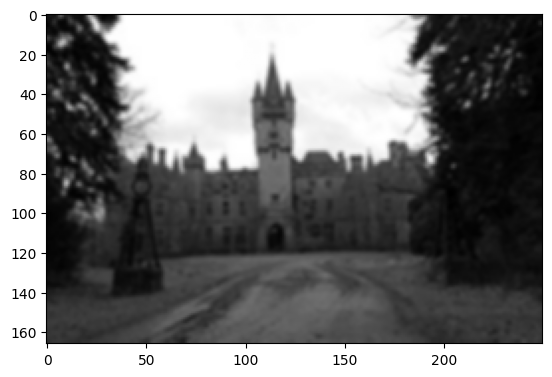

In [3]:
plt.imshow(image,cmap="gray")

In [ ]:

# 2: Edge Detection
edges_canny = cv2.Canny(image, 50, 150)
edges_sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
edges_sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
edges_combined = cv2.addWeighted(edges_sobelx, 0.5, edges_sobely, 0.5, 0)


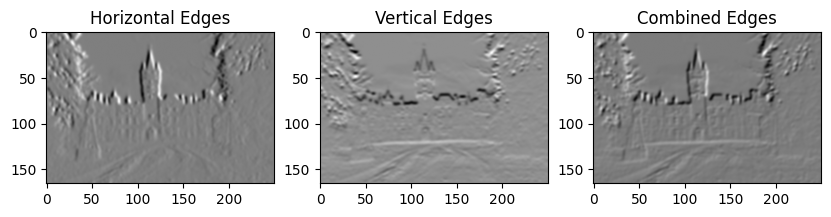

In [ ]:
# 3: Display Horizontal, Vertical, and Combined Edges
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1), plt.imshow(edges_sobelx, cmap='gray'), plt.title('Horizontal Edges')
plt.subplot(1, 3, 2), plt.imshow(edges_sobely, cmap='gray'), plt.title('Vertical Edges')
plt.subplot(1, 3, 3), plt.imshow(edges_combined, cmap='gray'), plt.title('Combined Edges')
plt.show()

In [ ]:
# 4: Fourier Transform of Boundary Points
y, x = np.where(edges_canny > 0)  # Extract boundary points
complex_boundary = x + 1j * y
fourier_coeffs = np.fft.fft(complex_boundary)

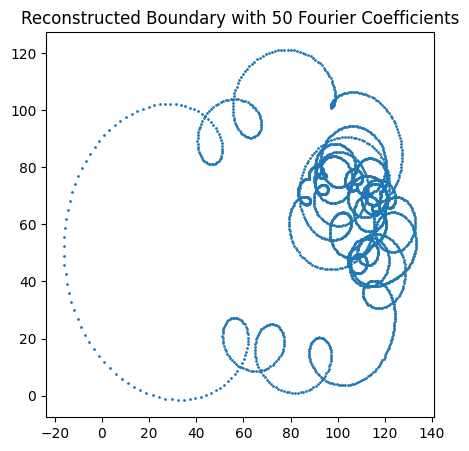

In [ ]:
# 5: Reconstruct the Boundary Using Selected Fourier Coefficients
num_coeffs = 50  # Keep only first 50 coefficients
filtered_coeffs = np.zeros_like(fourier_coeffs)
filtered_coeffs[:num_coeffs] = fourier_coeffs[:num_coeffs]
reconstructed_boundary = np.fft.ifft(filtered_coeffs)

plt.figure(figsize=(5, 5))
plt.scatter(np.real(reconstructed_boundary), np.imag(reconstructed_boundary), s=1)
plt.title(f"Reconstructed Boundary with {num_coeffs} Fourier Coefficients")
plt.show()


Fourier descriptors provide:
- Scale Invariance: Normalization makes it independent of size.
- Translation Invariance: Centering at the centroid removes translation dependency.
- Rotation Invariance: Only the magnitude of Fourier coefficients is used.

Applications of FFT:
1. Image Compression (JPEG)
2. Signal Processing (Speech Recognition)
3. Medical Imaging (MRI & CT Scans)
4. Pattern Recognition
5. Optical Character Recognition (OCR)
